# 📈 ➕ 📉 Simple Linear Regression Model :- Predicting sunday newspaper circulation based on weekly newspaper circulation

### Design and implement simple linear regression model to predict sunday newspaper 
### circulation based on daily newspaper circulation

### predict sunday paper circulation for 200,300 and 500 daily circulation

### Evaluate model with R-square and Adjusted R -Square


# Import Data Set

In [1]:
import pandas as pd

df_news = pd.read_csv("NewspaperData.csv")


In [2]:
df_news.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [35]:
df_news.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


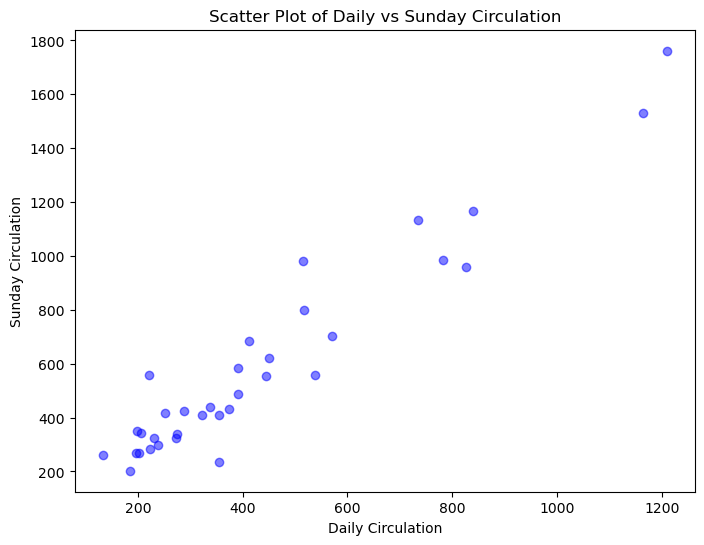

In [36]:
import matplotlib.pyplot as plt



# Extracting daily and Sunday circulation data
daily_data = df_news['daily']
sunday_data = df_news['sunday']

# Plotting scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(daily_data, sunday_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Daily vs Sunday Circulation')
plt.xlabel('Daily Circulation')
plt.ylabel('Sunday Circulation')
#plt.grid(True)
plt.show()


In [8]:
# write your inferance for  plot 

Fitting a Linear Regression Model

In [41]:
df_news.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [38]:
import statsmodels.formula.api as smf

model = smf.ols("sunday~daily",data = df_news).fit() # ordinary least square method for calc co-effi

In [39]:
# regression equation has built successfully

In [40]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [42]:
#t and p-Values

print(f'model t-values:\n{model.tvalues}\n-----------------\nmodel p-values: \n{model.pvalues}')    

model t-values:
Intercept     0.386427
daily        18.934840
dtype: float64
-----------------
model p-values: 
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


### To summerise if p value for any feature (variable) is < 0.05 , 
### that variable is important , and suggest not drop from dataset

In [13]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [45]:
# to prdecit for 200 daily circulation
(1.339715*500)+13.835630

683.69313

In [15]:
# predict value for 300,500

In [50]:
model.rsquared

0.9180596895873295

In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

###  R-squared 


R² tells us how well the model fits the data. Closer to 1 = better fit.

Example: If R² = 0.91, the model explains 91% of the variation in y."

But R² has a quirk—it always increases when we add more features, even useless ones!

### Adjusted R-squared deals with this issue.

Adjusted R² fixes this quirk by penalizing extra features that don’t help.

Rule of thumb: If a feature doesn’t improve the model enough, Adjusted R² decreases.

Watch how Adjusted R² changes when we add/remove features later!


# Predict for new data point

In [46]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,500])

In [47]:
newdata

0    200
1    300
2    500
dtype: int64

In [48]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [19]:
data_pred

,daily
0,200
1,300
2,500


In [49]:
model.predict(data_pred)

0    281.778581
1    415.750057
2    683.693009
dtype: float64

In [51]:
model.summary() # for Reference / Research purpose only

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           6.02e-19
Time:                        19:15:24   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""